In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:/Users/icear/OneDrive/바탕 화면/새 폴더/porto-seguro-safe-driver-prediction')

sns.set_palette("pastel")
sns.set_style('whitegrid')

# 한글 폰트가 깨지므로 한글폰트 대체
from matplotlib import font_manager,rc
font_location='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

- Data Description에 의하면 데이터는 ind, reg, car, calc로 구분되고 뒤에 _bin은 이진, _cat은 카테고리, 없으면 연속형이나 순서형 변수라고 한다.
- NULL값은 -1로 표기가 된다고 한다.

In [4]:
column = train.columns
null_list = list()
for i in column:
    if -1 in train[i].to_list():
        null_list.append(i)
        
print(null_list, '\n\n null이 포함된 변수 :',len(null_list))

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14'] 

 null이 포함된 변수 : 13


- NULL이 포함된 변수는 총 13개다.
- 13개의 변수가 NULL을 얼마나 포함하고 있는지 파악할 필요가 있어보인다.
- NULL이 포함되어 있는 변수가 보통 cat인거 같다,

In [5]:
for i in null_list:
    print(train[i].value_counts(normalize = True))

 1    0.725555
 2    0.207612
 3    0.047355
 4    0.019116
-1    0.000363
Name: ps_ind_02_cat, dtype: float64
 0    0.582927
 1    0.416934
-1    0.000139
Name: ps_ind_04_cat, dtype: float64
 0    0.887094
 6    0.034714
 4    0.030819
 1    0.013982
 3    0.013832
-1    0.009760
 2    0.007029
 5    0.002770
Name: ps_ind_05_cat, dtype: float64
-1.000000    0.181065
 0.633936    0.001116
 0.602599    0.001070
 0.704894    0.001053
 0.587899    0.001035
               ...   
 0.301040    0.000002
 1.409787    0.000002
 2.090155    0.000002
 1.772357    0.000002
 1.888452    0.000002
Name: ps_reg_03, Length: 5013, dtype: float64
 11    0.348738
 7     0.301148
 6     0.104825
 10    0.084150
 4     0.043974
 9     0.034144
 5     0.030480
 8     0.025357
 3     0.011186
 0     0.009919
 2     0.003602
 1     0.002297
-1     0.000180
Name: ps_car_01_cat, dtype: float64
 1    0.829940
 0    0.170052
-1    0.000008
Name: ps_car_02_cat, dtype: float64
-1    0.690898
 1    0.185999
 0    0.1

- ps_car_03_cat의 경우 null값의 비율이 약 69%이고, ps_car_05_cat의 null값의 비율이 약 44.7%정도이다.

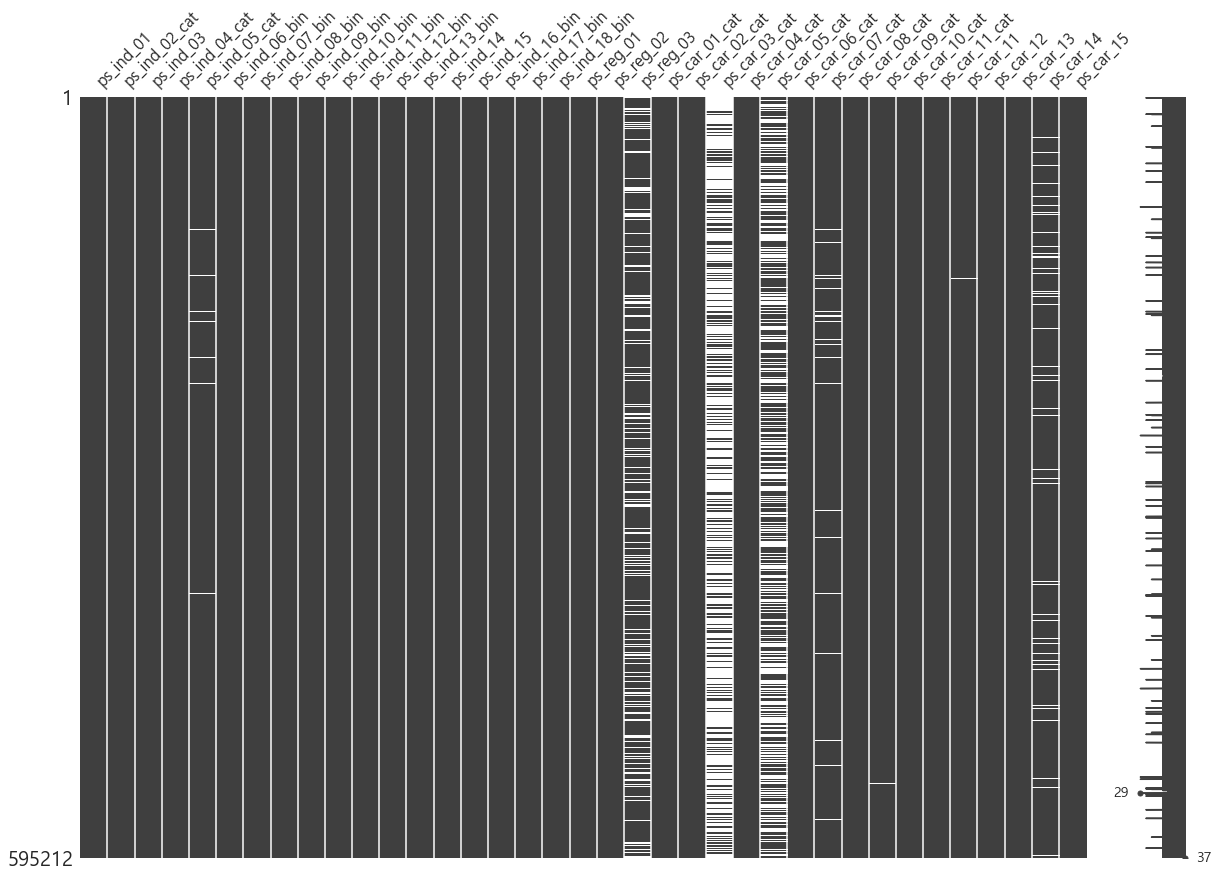

In [6]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

test_copy = test.copy()
test_copy = test_copy.replace(-1, np.NaN)

import missingno as msno
msno.matrix(df=train_copy.iloc[:, 2:39],
           figsize=(20,14))

plt.show()

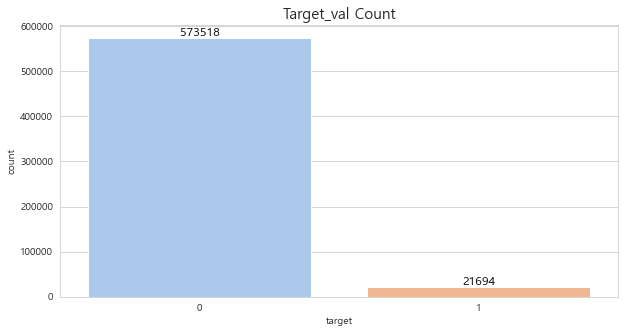

In [7]:
f, ax = plt.subplots(figsize = (10,5))

sns.countplot(data = train, 
              x = 'target').set_title('Target_val Count', fontsize = 15)

# annotate 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), 
                (p.get_x() + p.get_width()/2., p.get_height() - 50),
                ha ='center', 
                va ='center', 
                fontsize = 12, 
                color = 'black', 
                xytext = (0, 5), 
                textcoords ='offset points') 


plt.show()

- class_imbalance가 심하네.. 나중에 균형을 맞춰줘야겠다.

In [8]:
# float과 int를 select_dtypes를 활용하여 구분
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

print(train_float.shape)
print(train_int.shape)

(595212, 10)
(595212, 49)


- 변수가 float인 경우와 int인 경우로 나누어서 상태확인
- float는 10개이고 int는 49개이다

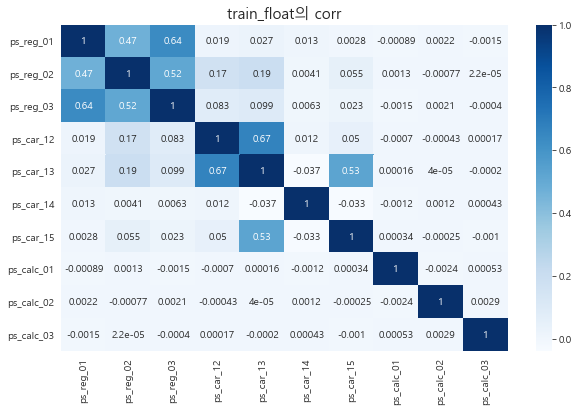

In [9]:
f, ax = plt.subplots(figsize = (10,6))

sns.heatmap(train_float.corr(), 
            annot = True, 
            cmap = 'Blues')
plt.title('train_float의 corr', fontsize = 15)

plt.show()

- 상관성이 있는 것  
(ps_reg_01 & ps_reg_02)  
(ps_reg_01 & ps_reg_03)  
(ps_reg_02 & ps_reg_03)  
(ps_car_12 & ps_car_13)  
(ps_car_13 & ps_car_15)

C:\Users\icear\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\icear\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


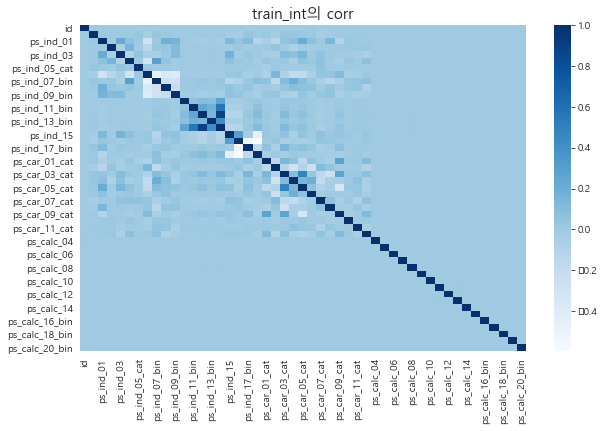

In [10]:
f, ax = plt.subplots(figsize = (10,6))

sns.heatmap(train_int.corr(), 
            annot = False, 
            cmap = 'Blues')
plt.title('train_int의 corr', fontsize = 15)

plt.show()

- 잘보이지는 않지만 대체적으로 큰 상관도는 없는듯 하다. 

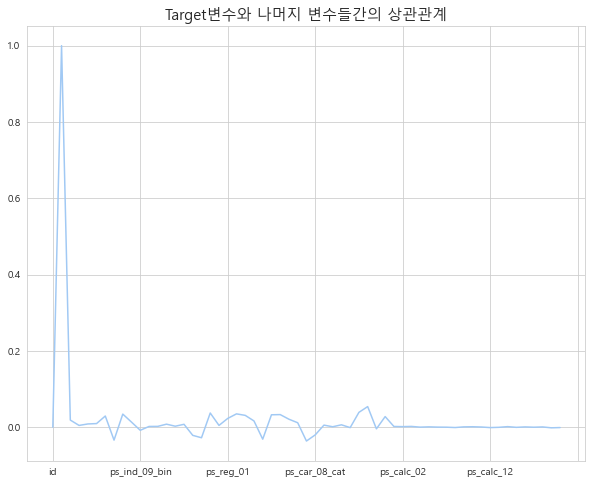

In [11]:
f, ax = plt.subplots(figsize = (10,8))

train.corr()['target'].plot()

plt.title('Target변수와 나머지 변수들간의 상관관계', fontsize = 15)
plt.show()

- target변수와 나머지 변수들 사이의 상관도는 거의 없다.

In [12]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)

clf.fit(train)
train_iso = clf.predict(train)
train_copy['iso'] = train_iso

train_new = train_copy[train_copy['iso']!=-1]

- Isolation Forest로 이상치값들을 제거한다.

In [13]:
del train_new['iso']

total_data = pd.concat([train_new, test_copy])
total_data.drop(['ps_car_03_cat', 'ps_car_05_cat', 'id'], axis = 1, inplace = True)
train_new.drop(['ps_car_03_cat', 'ps_car_05_cat', 'id'], axis = 1, inplace = True)
test_copy.drop(['ps_car_03_cat', 'ps_car_05_cat', 'id'], axis = 1,  inplace = True)

print(train_new.shape)
print(test_copy.shape)
print(total_data.shape)

(535690, 56)
(892816, 55)
(1428506, 56)


C:\Users\icear\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
def replace(data):
    cat = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_07_cat', 'ps_car_09_cat',
          'ps_car_11']
    num = ['ps_reg_03', 'ps_car_12', 'ps_car_14']
    
    from scipy.stats import mode
    
    for i in cat:
        data[i].fillna(mode(total_data[i])[0][0], inplace = True) # 범주형 데이터 최빈값 대체
    for w in num:
        data[w].fillna(total_data[w].mean(), inplace = True) # 수치형 데이터 mean값으로 대체

replace(train_new)
replace(test_copy)

C:\Users\icear\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
def col_type(columns, type):
    for i in columns:
        train_new[i] = train_new[i].astype(type)
    
    return train_new

In [16]:
train_new_z = train_new[train_new['target']==0]
train_new_o = train_new[train_new['target']==1]

count_class_0, count_class_1 = train_new['target'].value_counts()
train_new_o = train_new_o.sample(count_class_0, replace=True)

train_new = pd.concat([train_new_z, train_new_o])
train_new['target'].value_counts()

1    519768
0    519768
Name: target, dtype: int64

- SMOTE로 오버 샘플링하면 데이터 타입에 null값이 생성 되기도 해서 pandas의 sample을 이용함

In [17]:
train_new_y = train_new['target']

del train_new['target']

# ps_calc_은 지워주는게 좋겠다는 kaggle 커널이 많음
col_to_drop = list(train_new.columns[train_new.columns.str.startswith('ps_calc_')])
train_new = train_new.drop(col_to_drop, axis=1)  
test_copy = test_copy.drop(col_to_drop, axis=1)

In [18]:
categorys = []

for i in train_new.columns:
    if i[-3:]=='cat':
        categorys.append(i)
        
train_new2 = pd.get_dummies(train_new,columns = categorys)
test_new2 = pd.get_dummies(test_copy,columns = categorys)

train_new2['target'] = train_new_y

print(train_new2.shape)
print(test_new2.shape)

(1039536, 195)
(892816, 194)


In [19]:
train_new2.to_csv('train_new.csv', index = False)
test_new2.to_csv('test_new.csv', index = False)